In [7]:
import sklearn.datasets
from libmlops.data.data_loading import load_csv_data, explore_dataset

# dataset = sklearn.datasets.fetch_california_housing(return_X_y=False, as_frame=True)["frame"]
# dataset.to_csv("../data/external/california_housing.csv", index=False)

# Load dataset
file_path = "../data/external/california_housing.csv"
dataset = load_csv_data(file_path)
# explore_dataset(dataset, show_ui=True)

dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
from libmlops.data.data_preprocessing import get_xy
from libmlops.features.feature_selection import convert_indices
from libmlops.utils.regressor_evaluation import features_evaluation
from libmlops.utils.features_evaluation import keep_features

X, Y = get_xy(dataset)
features = features_evaluation(X, Y, verbose=True)
features = convert_indices(dataset, features)
print(features)
dataset_reduced = keep_features(dataset, features)

dataset_reduced.head()

LINR [0, 6, 7]
RDG [0, 6, 7]
LSO [0]
ELN [0]
DTR [0, 6, 7]
RFR [0, 6]


c:\Users\root\AppData\Local\pypoetry\Cache\virtualenvs\mlops-template-S-gadGQo-py3.11\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVR [0]
KNR [0, 1, 4]
GBR [0, 6, 7]
[0, 6, 7, 1, 4]
['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude']


,MedInc,HouseAge,Population,Latitude,Longitude
0,8.3252,41.0,322.0,37.88,-122.23
1,8.3014,21.0,2401.0,37.86,-122.22
2,7.2574,52.0,496.0,37.85,-122.24
3,5.6431,52.0,558.0,37.85,-122.25
4,3.8462,52.0,565.0,37.85,-122.25


LINR: -0.544105 (0.006084)
RDG: -0.544103 (0.006084)
LSO: -0.768008 (0.009274)
ELN: -0.679451 (0.008037)
DTR: -0.415430 (0.007312)
RFR: -0.312836 (0.004018)
SVR: -0.964474 (0.238461)
KNR: -0.821121 (0.008108)
GBR: -0.392083 (0.003729)


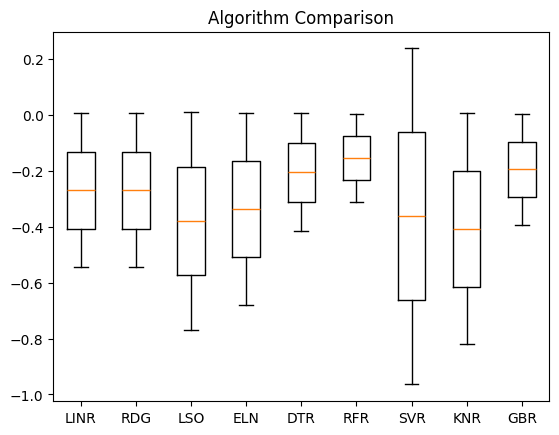

In [9]:
from libmlops.utils.regressor_evaluation import (
    algorithm_evaluation,
    compare_algorithms,
)

X = dataset_reduced
Y = dataset[["MedHouseVal"]]
results, names = algorithm_evaluation(X, Y, verbose=True)
compare_algorithms(results, names)

In [10]:
from libmlops.data.data_loading import save_datasets
from libmlops.data.data_preprocessing import split_train_test_xy


X_train, X_validation, Y_train, Y_validation = split_train_test_xy(X, Y, random_state=1)
save_datasets(
    [X_train, X_validation, Y_train, Y_validation],
    ["X_train", "X_validation", "Y_train", "Y_validation"],
    save_path="../data/processed",
)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models, save_models
from libmlops.models.model_training import train_model

LOAD_MODEL = False

print("Loading training datasets")
[X_train, Y_train] = load_datasets(
    ["X_train", "Y_train"], save_path="../data/processed/"
)

model = []
model_name = "finalised_model"
if LOAD_MODEL:
    print("Loading previous model")
    model = load_models(model_name, save_path="../data/processed/")

if model == []:
    print("Does not exist - creating new model")
    model = RandomForestRegressor(n_jobs=-1)
    print("Training model")
    train_model(model, X_train, Y_train)
    print("Saving model")
    save_models(model, model_name, save_path="../data/processed/")

Loading training datasets
Does not exist - creating new model
Training model
Saving model


In [12]:
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models
from libmlops.utils.regressor_evaluation import model_evaluation

print("Loading validation datasets")
[X_validation, Y_validation] = load_datasets(
    ["X_validation", "Y_validation"], save_path="../data/processed/"
)

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

print("Evaluating model")
accuracy, report, cv_results_mean, cv_results_std = model_evaluation(
    model, X_validation, Y_validation
)
print("Accuracy score: ", accuracy, "\n")
print("Classification report:\n", report)
print("Cross-validation: %f Mean (%f Standard)" % (cv_results_mean, cv_results_std))

Loading validation datasets
Loading previous model
Evaluating model
Accuracy score:  0.8145372528711007 

Classification report:
 0.31752294396802344
Cross-validation: -0.377093 Mean (0.006829 Standard)


In [13]:
import pandas as pd

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

names = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude",
]
data = [
    [
        8.3252,
        41.0,
        6.984126984126984,
        1.0238095238095237,
        322.0,
        2.5555555555555554,
        37.88,
        -122.23,
    ],  # 4.526
    [
        2.6042,
        46.0,
        4.489563567362429,
        1.0910815939278937,
        1647.0,
        3.1252371916508537,
        37.79,
        -122.22,
    ],  # 1.247
    [
        5.1498,
        35.0,
        7.256130790190736,
        1.0544959128065394,
        1086.0,
        2.9591280653950953,
        37.71,
        -122.09,
    ],  # 2.664
    [
        10.5941,
        18.0,
        7.537037037037037,
        0.9481481481481482,
        1580.0,
        2.925925925925926,
        35.34,
        -119.08,
    ],  # 2.458
    [
        8.5325,
        14.0,
        7.973584905660378,
        0.9660377358490566,
        842.0,
        3.177358490566038,
        35.35,
        -119.09,
    ],  # 2.241
]

df = pd.DataFrame(data, columns=names)

df

Loading previous model


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,2.6042,46.0,4.489564,1.091082,1647.0,3.125237,37.79,-122.22
2,5.1498,35.0,7.256131,1.054496,1086.0,2.959128,37.71,-122.09
3,10.5941,18.0,7.537037,0.948148,1580.0,2.925926,35.34,-119.08
4,8.5325,14.0,7.973585,0.966038,842.0,3.177358,35.35,-119.09


In [14]:
if features != []:
    df_new = keep_features(df, features)
    print(features, df_new.columns)

df_new

['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude'] Index(['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude'], dtype='object')


,MedInc,HouseAge,Population,Latitude,Longitude
0,8.3252,41.0,322.0,37.88,-122.23
1,2.6042,46.0,1647.0,37.79,-122.22
2,5.1498,35.0,1086.0,37.71,-122.09
3,10.5941,18.0,1580.0,35.34,-119.08
4,8.5325,14.0,842.0,35.35,-119.09


In [15]:
for index, row in df_new.iterrows():
    # test the model with 1 row
    print(index, row.values)
    print(model.predict(pd.DataFrame([row.values], columns=row.index)))

0 [   8.3252   41.      322.       37.88   -122.23  ]
[4.4892515]
1 [   2.6042   46.     1647.       37.79   -122.22  ]
[1.37381]
2 [   5.1498   35.     1086.       37.71   -122.09  ]
[2.53439]
3 [  10.5941   18.     1580.       35.34   -119.08  ]
[3.4885931]
4 [   8.5325   14.      842.       35.35   -119.09  ]
[2.8927509]
